In [2]:
import tensorflow as tf
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
import nibabel as nib

In [3]:
num_of_epochs = 1
global_best_metric = 0
def read_ct(path):
    img = nib.load(path)
    img = img.get_data()
    return img
def loadCT(path):
    images = glob.glob(path+"/volume*")
    segmentations = glob.glob(path+"/segmentation*", )
    images = sorted(images)
    segmentations = sorted(segmentations)
    return images , segmentations
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p

In [4]:
from skimage.segmentation import find_boundaries

w0 = 5
sigma = 20

def myWeights(masks):
    ## (512,512)
    print("called")
    distMap = np.zeros((512*512, 1))
    X1, Y1 = np.meshgrid(np.arange(512), np.arange(512))
    X1, Y1 = np.c_[X1.ravel(), Y1.ravel()].T
    for i in range(1):
        bounds = find_boundaries(masks, mode='inner')
        X2, Y2 = np.nonzero(bounds)
        xSum = (X2.reshape(-1, 1) - X1.reshape(1, -1)) ** 2
        ySum = (Y2.reshape(-1, 1) - Y1.reshape(1, -1)) ** 2
        distMap[:,i] = np.sqrt(xSum + ySum).min(axis=0)
    d1 = distMap.ravel()
    border_loss_map = w0 * np.exp((-1 * (d1) ** 2) / (2 * (sigma ** 2)))
    xBLoss = np.zeros((512, 512))
    xBLoss[X1, Y1] = border_loss_map
    return xBLoss

def getWeightMaps(masks):
    weightMaps = []
    for i in range(masks.shape[0]):
        if i%20==0:
            print("i ",i)
        weightMaps.append(myWeights(masks[i]))
    return weightMaps

In [5]:
path = "../data/batch"
images ,segmentations = loadCT(path)
savepath = "../data/weightMaps"

for i in range(1,10):
    y_train = []
    # img = read_ct(images[i])
    seg = read_ct(segmentations[i])
    print("img ", i)
    ##img shape: (512,512,X) X is the sum of all slices of num_ct files
    for j in range(0,seg.shape[2]):
        sseg = seg[:,:,j]
        sseg[sseg > 0] = 1
        if np.sum(sseg == 1)>0 :
    #         X_train.append(simg)
            y_train.append(sseg)
    y_train = np.array(y_train)
    print("Shape of y_train ",y_train.shape)
    weights = getWeightMaps(y_train)
    sp = savepath + "/weight{}.npy".format(i)
    np.save(sp, weights) # save
#     new_num_arr = np.load('data.npy') # load

img  0
Shape of y_train  (276, 512, 512)
i  0
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
i  20
called
called
called


KeyboardInterrupt: 

In [4]:
path = "../data/batch"
images ,segmentations = loadCT(path)
savepath = "../data/weightMaps"
i = 0
y_train = []
# img = read_ct(images[i])
seg = read_ct(segmentations[i])
print("img ", i)
##img shape: (512,512,X) X is the sum of all slices of num_ct files
for j in range(0,seg.shape[2]):
    sseg = seg[:,:,j]
    sseg[sseg > 0] = 1
    if np.sum(sseg == 1)>0 :
#         X_train.append(simg)
        y_train.append(sseg)
y_train = np.array(y_train)

img  0


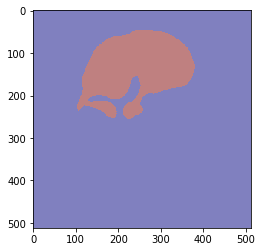

In [5]:
plt.imshow(y_train[134], cmap='jet', alpha=0.5)

i  0
called


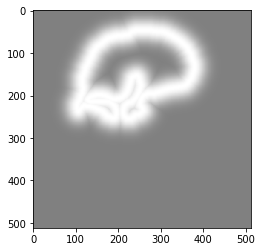

In [8]:
weights = getWeightMaps(y_train[134:135])
plt.imshow(weights[0], cmap='gray', alpha=0.5)
# weights.shape